여기는 "파이썬 머신러닝 완벽 가이드" 책을 보면서 몰랐던 부분을 적는 장소 입니다.

1. 왜 결정트리의 파라미터에 random_state가 들어가야 하는 지는 잘 모르겠다.

# 1. 분류

## 결정트리 
결정트리는 정보균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다. <br>
정보균일도는 지니계수와 엔트로피를 이용한 정보 이득 지수가 있는데, DecisionTreeClassifier에서는 지니계수를 이용해서 분류를 한다.

#### DecisionTreeClassifier(min_samples_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes) 
min_samples_split : 노드를 분할하기 위한 최소한의 데이터 수 (default = 2) <br>
과적합을 제어하기 위함. 이 파라미터가 작아지면 과적합이 될 가능성이 커짐

min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터 수 <br>
과적합을 제어하기 위함이지만, 비대칭적 데이터의 경우에 작게 설정을 해야한다. 

max_features : 최적의 분할을 위해 고려할 최대 피처 개수.
1. int/float : 피처의 개수/ 선택할 피처의 %
2. sqrt, auto : sqrt(전체 피처)의 개수만큼 선택
3. log : log2(전체 피처)의 개수만큼 선택
4. None : default

max_lepth : 트리의 최대 깊이를 규정. (default = None). 깊이가 깊어지면 과적합할 가능성이 높아짐

max_leaf_nodes : 말단 노드의 최대 개수

## 결정 트리 모델의 시각화 (Grphviz를 이용함)


In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

#모델 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

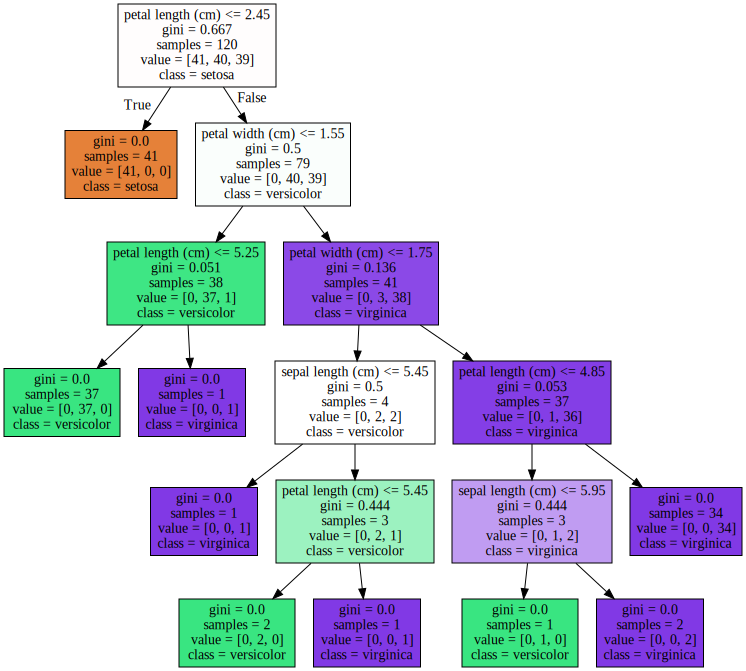

In [3]:
from sklearn.tree import export_graphviz

# export_graphviz() 의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
               feature_names = iris_data.feature_names, impurity=True, filled=True)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## feature_importance 구해보기

Feature importances: 
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

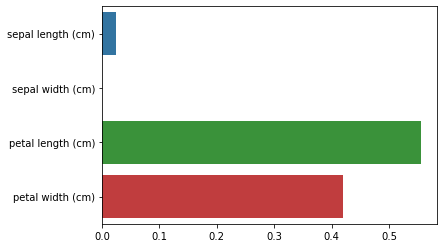

In [12]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances: \n{}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

## 결정트리 과적합 make_classification()

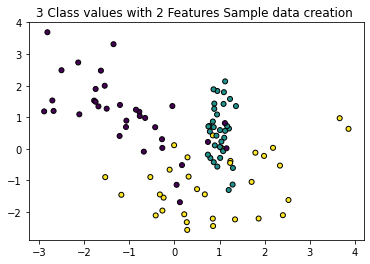

In [25]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)
    
plt.title("3 Class values with 2 Features Sample data creation ")

# 2차원 시각화를 위해사 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

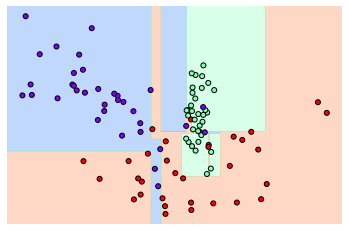

In [27]:
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

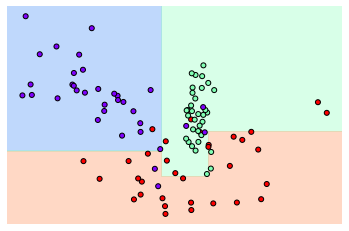

In [34]:
# 과적합이} 완화됨
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

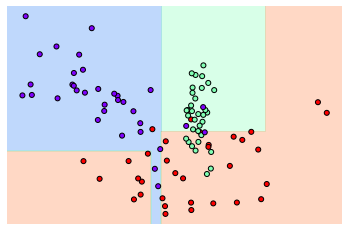

In [35]:
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

## 결정 트리 실습- 사용자 행동 인식 데이터 세트

In [42]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

# feature 이름 불러오기
# sep='\s+': 공백문자는 건너 뜀, header=None : 피처네임이 없는 것
feature_name_df = pd.read_csv('human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
feature_name = feature_name_df.iloc[:,1].values.tolist() # values로 피처이름만 받아온 후 tolist로 리스트 객체로 생성


In [95]:
# 겹치는 피처네임 없애기
def get_new_feature_name_df(old_feature_name_df):
    #column_name 컬럼에서 겹치는 이름을 찾아내서 몇번째 겹치는지 알려줌. 아래 박스에 결과를 보여주겠음
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),\
                                                                  columns=['dup_cnt'])
    #인덱스를 리셋함
    feature_dup_df = feature_dup_df.reset_index()
    # 어느 한쪽에라도 NaN이 있는 경우 NaN이 되도록 합침
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    # columns 방향으로 lambda 함수를 사용함
    new_feature_name_df['column_name'] =new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])\
                                                                                             if x[1] >0 else x[0], axis=1) 
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df


In [96]:
feature_dup_df = pd.DataFrame(data=feature_name_df.groupby('column_name').cumcount(),\
                                                                  columns=['dup_cnt'])
feature_dup_df = feature_dup_df.reset_index()
new_feature_name_df = pd.merge(feature_name_df.reset_index(), feature_dup_df, how='outer')
new_feature_name_df['column_name'] =new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])\
                                                                                             if x[1] >0 else x[0], axis=1) 
new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
new_feature_name_df

,column_index,column_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0
...,...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)",0
557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,559,"angle(X,gravityMean)",0
559,560,"angle(Y,gravityMean)",0


In [100]:
def get_human_dataset():
    feature_name_df = pd.read_csv('human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    X_train = pd.read_csv('human_activity/train/X_train.txt', sep='\s+', header=None, names=feature_name)
    X_test = pd.read_csv('human_activity/test/X_test.txt', sep='\s+', header=None, names=feature_name)
    
    y_train = pd.read_csv('human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [101]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [103]:
# y 값이 고르게 분포함
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("결정트리 정확도: {0:.4f}".format(accuracy))
print("결정트리 기본 하이퍼 파라미터:\n", dt_clf.get_params())

결정트리 정확도: 0.8548
결정트리 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}
